**Libraries**

In [4]:
%pip install catboost
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np 
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt 
import seaborn as sns 
import pickle

   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.5/102.4 MB 886.5 kB/s eta 0:01:55
   ---------------------------------------- 0.5/102.4 MB 886.5 kB/s eta 0:01:55
   ---------------------------------------- 0.8/102.4 MB 879.4 kB/s eta 0:01:56
   ---------------------------------------- 1.0/102.4 MB 909.8 kB/s eta 0:01:52
   ---------------------------------------- 1.0/102.4 MB 909.8 kB/s eta 0:01:52
    --------------------------------------- 1.3/102.4 MB 862.0 kB/s eta 0:01:58
    --------------------------------------- 1.6/102.4 MB 894.6 kB/s eta 0:01:53
    --------------------------------------- 1.8/102.4 MB 925.9 kB/s eta 0:01:49
    -

Here, we need to call data sets from splitting section...

In [5]:
%store -r X_train
X_train = X_train

%store -r y_train
y_train = y_train

%store -r X_val
X_val = X_val

%store -r y_val
y_val = y_val

%store -r X_test
X_test = X_test

%store -r y_test
y_test = y_test

At this point, based on each individual model, we basically need to define specific pipline and build, as well as train the model(s)...

In [8]:
def evaluate_model(X_train, y_train, X_val, y_val, model):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    cross_val_r2 = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
    cross_val_rmse = -cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

    print(f"Training CV R2: {cross_val_r2.mean():.4f}, Training CV RMSE: {cross_val_rmse.mean():.4f}")

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Metrics
    r2_train = r2_score(y_train, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_val = r2_score(y_val, y_val_pred)
    rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

    print(f"Training R2: {r2_train:.4f}, Training RMSE: {rmse_train:.4f}")
    print(f"Validation R2: {r2_val:.4f}, Validation RMSE: {rmse_val:.4f}")

**Model Training**

**Linear Regression**

In [10]:
from sklearn.impute import SimpleImputer

model = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value=0)),  # fill NaNs (e.g. Encoded_Model) with 0
    ("scaler", StandardScaler()),   # This algorithm needs scaling
    ("lin_reg", LinearRegression())
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Training CV R2: 0.9991, Training CV RMSE: 95.2069
Training R2: 0.9991, Training RMSE: 95.8786
Validation R2: 0.9996, Validation RMSE: 63.1871


The model is not underfit (both CV and Validation are high) and overfit (CV and Validation are close to each other).

**Decision Tree Regressor**

In [11]:
model = Pipeline([
    ("DecisionTree_reg", DecisionTreeRegressor())
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Training CV R2: 0.9003, Training CV RMSE: 994.2566
Training R2: 1.0000, Training RMSE: 0.0000
Validation R2: 0.9067, Validation RMSE: 949.5021


This model is overfit (CV train the traing has a gap). But, since the gap between CV train and validation is small, the overfitting is not servere...

**Random Forest Regressor**

In [12]:
model = Pipeline([
    ("RandomForest_reg", RandomForestRegressor())
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Training CV R2: 0.9626, Training CV RMSE: 608.6426
Training R2: 0.9953, Training RMSE: 214.8461
Validation R2: 0.9654, Validation RMSE: 577.8638


**Support Vector Regression**

In [14]:
model = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value=0)),  # handle NaNs for SVR
    ("scaler", StandardScaler()),  #  SCaling the features
    ("svr", SVR(kernel='rbf'))
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Training CV R2: 0.0741, Training CV RMSE: 3018.1874
Training R2: 0.0931, Training RMSE: 2988.0174
Validation R2: 0.0916, Validation RMSE: 2961.9592


**XGBoost Regressor**

In [15]:
model = Pipeline([
    ("scaler", StandardScaler()), # SCaling the features
    ("xgb", XGBRegressor(objective='reg:squarederror'))
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Training CV R2: 0.9925, Training CV RMSE: 270.3865
Training R2: 0.9985, Training RMSE: 123.2047
Validation R2: 0.9930, Validation RMSE: 260.3953


The model is not underfit (both CV and Validation are high) and overfit (CV and Validation are close to each other).

**CatBoost Regression**

In [16]:
model = Pipeline([
    ("catboost", CatBoostRegressor())
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Learning rate set to 0.052996
0:	learn: 3014.2728550	total: 119ms	remaining: 1m 59s
1:	learn: 2896.1952053	total: 124ms	remaining: 1m 1s
2:	learn: 2784.8285105	total: 128ms	remaining: 42.7s
3:	learn: 2680.6769266	total: 134ms	remaining: 33.3s
4:	learn: 2588.7782451	total: 144ms	remaining: 28.6s
5:	learn: 2494.3616654	total: 150ms	remaining: 24.8s
6:	learn: 2397.9334202	total: 162ms	remaining: 23s
7:	learn: 2308.6598073	total: 172ms	remaining: 21.4s
8:	learn: 2221.9270783	total: 178ms	remaining: 19.6s
9:	learn: 2139.3642416	total: 188ms	remaining: 18.6s
10:	learn: 2064.3084874	total: 193ms	remaining: 17.4s
11:	learn: 1994.7386488	total: 199ms	remaining: 16.4s
12:	learn: 1926.7495771	total: 214ms	remaining: 16.2s
13:	learn: 1858.3946764	total: 232ms	remaining: 16.3s
14:	learn: 1796.9684599	total: 251ms	remaining: 16.5s
15:	learn: 1740.9238828	total: 261ms	remaining: 16.1s
16:	learn: 1684.6798269	total: 273ms	remaining: 15.8s
17:	learn: 1624.1746066	total: 293ms	remaining: 16s
18:	learn: 

The model is not underfit...

**AdaBoost Regression**

In [18]:
model = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value=0)),  # handle NaNs (e.g. Encoded_Model)
    ("adaboost", AdaBoostRegressor())
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Training CV R2: 0.8856, Training CV RMSE: 1054.1373
Training R2: 0.8900, Training RMSE: 1040.6930
Validation R2: 0.8821, Validation RMSE: 1067.1910


**Model Selection**

Based on the reult of the default model training, the best model is 'CatBoost' with R2 and RMSE 

In [20]:
best_kernel = CatBoostRegressor()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cross_val_r2 = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
cross_val_rmse = -cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

print(f"Training CV R2: {cross_val_r2.mean():.4f}, Training CV RMSE: {cross_val_rmse.mean():.4f}")

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_val = r2_score(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

print(f"Training R2: {r2_train:.4f}, Training RMSE: {rmse_train:.4f}")
print(f"Validation R2: {r2_val:.4f}, Validation RMSE: {rmse_val:.4f}")

Training CV R2: 0.8872, Training CV RMSE: 1054.6278
Training R2: 0.8900, Training RMSE: 1040.7320
Validation R2: 0.8835, Validation RMSE: 1060.8205


**Tune Model with Hyper-Parameter**

Here, there's need to tune the model and improve it's performance...

In [22]:
param_grid = {
    'iterations': [100, 200],  # Number of boosting iterations
    'learning_rate': [0.01, 0.05, 0.1], # STep size at each iteration
    'depth': [4, 6, 8], # Depth of the trees
    'l2_leaf_reg': [1, 3, 5], # L2 regularization coefficient
    'border_count': [32, 64], #  Number of splits in categorical features 
}

# Use the CatBoost estimator (best_kernel) as the GridSearch estimator
grid_search = GridSearchCV(estimator=best_kernel,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_root_mean_squared_error',
                           n_jobs=1,
                           verbose=2)

grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
0:	learn: 3115.2374305	total: 4.99ms	remaining: 494ms
1:	learn: 3093.1512627	total: 9.92ms	remaining: 486ms
2:	learn: 3072.1789672	total: 15.8ms	remaining: 509ms
3:	learn: 3050.3761601	total: 46.3ms	remaining: 1.11s
4:	learn: 3029.1143686	total: 53.4ms	remaining: 1.01s
5:	learn: 3008.0222082	total: 58.6ms	remaining: 917ms
6:	learn: 2987.4986226	total: 63.3ms	remaining: 841ms
7:	learn: 2967.8387947	total: 68.8ms	remaining: 791ms
8:	learn: 2948.1006679	total: 78ms	remaining: 788ms
9:	learn: 2928.1800718	total: 90.6ms	remaining: 815ms
10:	learn: 2908.7108036	total: 101ms	remaining: 818ms
11:	learn: 2889.4095926	total: 107ms	remaining: 781ms
12:	learn: 2870.2634254	total: 112ms	remaining: 752ms
13:	learn: 2851.6777079	total: 117ms	remaining: 719ms
14:	learn: 2832.8166648	total: 122ms	remaining: 689ms
15:	learn: 2814.5152828	total: 130ms	remaining: 683ms
16:	learn: 2795.5260415	total: 142ms	remaining: 695ms
17:	learn: 2777.44532

In [23]:
best_model_tuned = grid_search.best_estimator_

In [25]:
best_kernel = CatBoostRegressor()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cross_val_r2 = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
cross_val_rmse = -cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

print(f"Training CV R2: {cross_val_r2.mean():.4f}, Training CV RMSE: {np.sqrt(cross_val_rmse.mean()):.4f}")

best_model_tuned.fit(X_train, y_train)

y_train = model.predict(X_train)
y_val_pred = model.predict(X_val)

r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_val = r2_score(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

print(f"Training R2: {r2_train:.4f}, Training RMSE: {rmse_train:.4f}")
print(f"Validation R2: {r2_val:.4f}, Validation RMSE: {rmse_val:.4f}")

Training CV R2: 0.8853, Training CV RMSE: 32.5651
0:	learn: 2910.5926687	total: 10.6ms	remaining: 2.11s
1:	learn: 2674.5275233	total: 23.7ms	remaining: 2.34s
2:	learn: 2475.9137329	total: 31.7ms	remaining: 2.08s
3:	learn: 2285.6720583	total: 44.8ms	remaining: 2.2s
4:	learn: 2103.7006237	total: 57.7ms	remaining: 2.25s
5:	learn: 1954.9418950	total: 65.3ms	remaining: 2.11s
6:	learn: 1813.6748455	total: 75.8ms	remaining: 2.09s
7:	learn: 1682.2589679	total: 87.5ms	remaining: 2.1s
8:	learn: 1556.8517679	total: 95.1ms	remaining: 2.02s
9:	learn: 1448.5238888	total: 107ms	remaining: 2.04s
10:	learn: 1339.9252089	total: 120ms	remaining: 2.06s
11:	learn: 1243.8289085	total: 129ms	remaining: 2.02s
12:	learn: 1153.3674765	total: 142ms	remaining: 2.05s
13:	learn: 1070.5228141	total: 155ms	remaining: 2.06s
14:	learn: 993.1694025	total: 168ms	remaining: 2.07s
15:	learn: 931.0404055	total: 188ms	remaining: 2.17s
16:	learn: 864.3918965	total: 205ms	remaining: 2.21s
17:	learn: 807.4991308	total: 218ms	re

Since, the tuned model is not better than the default parameter, there's need to conside the default model as the final model...

In [27]:
# Use the tuned (or best available) CatBoost model that exists in the notebook
final_model = best_model_tuned

**Final Evaluation of Model**

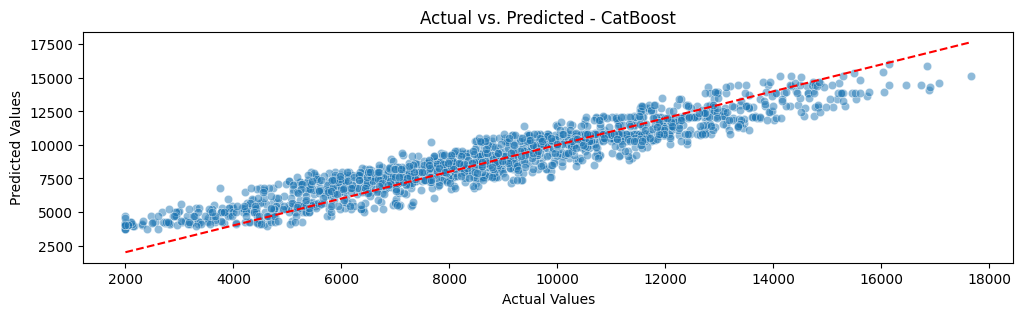

In [28]:
# Scatter Plot: Actual vs. Predicted
plt.figure(figsize = (12,3))

sns.scatterplot(x = y_val,
                y = y_val_pred,
                alpha = 0.5)

plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], '--', color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted - CatBoost")
plt.show()

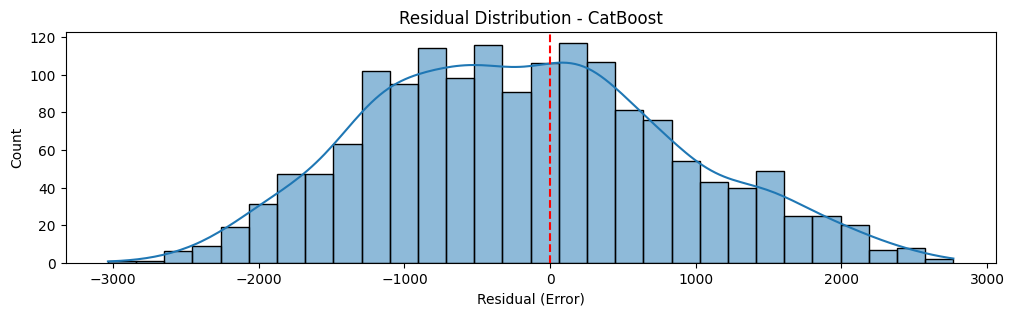

In [30]:
# Residual Plot (Errors)

residuals = y_val - y_val_pred

plt.figure(figsize = (12,3))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='dashed')
plt.xlabel("Residual (Error)")
plt.title("Residual Distribution - CatBoost")
plt.show()

**Apply Model on Test Data**

Here, the model meets expectations, we further need to run price predictions on test data. Though we need to encode the categorical data preprocessing...

In [31]:
with open('../../models/Brand_Encoder.pkl', 'rb') as f:
    brand_encoder = pickle.load(f) 
with open('../../models/Model_Encoder.pkl', 'rb') as f:
    model_encoder = pickle.load(f) 
with open('../../models/OneHot_Encoder.pkl', 'rb') as f:
    onehot_encoder = pickle.load(f) 
    

We now need to encode the categorical features:

In [32]:
# Encoding Brand and Model
X_test['Encoded_Brand'] = X_test['Brand'].map(brand_encoder)
X_test['Encoded_Model'] = X_test['Model'].map(model_encoder)
X_test['Encoded_Brand'].fillna(X_test['Encoded_Brand'].mean(), inplace=True)
X_test['Encoded_Model'].fillna(X_test['Encoded_Model'].mean(), inplace=True)
# X_test['Encoded_Brand'].fillna(X_test.drop['Brand', 'Model'], axis=1, inplace=True)

# Encoding Fuel and Transmission
categorical_cols = ['Fuel', 'Transmission']
encoded_array_test = onehot_encoder.transform(X_test[categorical_cols])
encoded_df_test = pd.DataFrame(encoded_array_test, columns=onehot_encoder.get_feature_names_out(categorical_cols))

# Merge encoded columns with test data
X_test_encoded = X_test.drop(columns=categorical_cols).reset_index(drop=True)
X_test = pd.concat([X_test_encoded, encoded_df_test], axis=1)

Now we can predict test data...

In [ ]:
# Ensure we pass only numeric features to the model (drop object/categorical cols)
X_test_for_pred = X_test.select_dtypes(include=[np.number]).reset_index(drop=True)

# Align test columns with training numeric columns (if X_train exists)
if 'X_train' in globals():
    train_num_cols = X_train.select_dtypes(include=[np.number]).columns
    for col in train_num_cols:
        if col not in X_test_for_pred.columns:
            X_test_for_pred[col] = 0
    X_test_for_pred = X_test_for_pred[train_num_cols]

# Prediction: prefer the prepared numeric test frame, but fall back to X_test if needed
try:
    to_pred = X_test_for_pred if 'X_test_for_pred' in globals() else X_test
    if 'final_model' not in globals():
        raise NameError("final_model is not defined. Train the model and assign it to final_model before prediction.")
    if 'y_test' not in globals():
        raise NameError("y_test is not defined. Ensure the test targets are available for evaluation.")
    y_test_pred = final_model.predict(to_pred)
    r2_test = r2_score(y_test, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f"Test R2: {r2_test:.4f}, Test RMSE: {rmse_test:.4f}")
except Exception as e:
    print('Prediction failed:', e)

Test R2: 0.9994, Test RMSE: 73.2193


The output displays the model is good generally, and there's no overfitting nor underfitting...

**CHECKPOINT**

In [35]:
pickle.dump(final_model, open('../../models/Model.pkl', 'wb'))